In [2]:
import pandas as pd
import numpy as np
from os import walk
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [ ]:
# функцая для графічної візуалізації виду сигналів з окремих файлів, використовувалася для розуміння чим відрізняются дані. вмикав за потреби
def main_plot(signals, root):
    labels = ['Axe X', 'Axe Y', 'Axe Z']
    colors = ['red', 'blue', 'green']
    for num, signal in enumerate(signals):
        plt.plot(signals[num], label=labels[num], color=colors[num])
    plt.xlabel("Number of samples")
    plt.ylabel("Amplitude")
    sample = root.split('\\')[-1]
    plt.title(f"Row vibration signal for '{sample}'", fontsize=15)
    plt.grid()
    plt.legend()
    plt.show()

In [1]:

def get_mean_acceleration(signal):
    frame_size = signal.shape[0]
    current_mean = np.sum(signal)/frame_size
    return current_mean

def get_std(signal):
    frame_size = signal.shape[0]
    current_std = np.sqrt(
        (np.sum((signal - (np.sum(signal)/frame_size))**2))/(frame_size-1))
    return current_std
def get_variance(signal):
    frame_size = signal.shape[0]
    current_var = (np.sum(np.sqrt(abs(signal)))/frame_size)**2
    return current_var

def get_rms_acceleration(signal):
    frame_size = signal.shape[0]
    current_rms = np.sqrt(np.sum(signal**2)/frame_size)
    return current_rms

def get_peak_acceleration(signal):
    return max(signal)

def get_skewness(signal):
    return skew(signal)

def get_kurtosis(signal):
    return kurtosis(signal)

In [3]:
# список викликаємих функцій для розрахунку окремих параметрів. для зручності розуміння
list_features_function = [get_peak_acceleration, get_rms_acceleration,  get_std, get_variance,
                          get_skewness, get_kurtosis, get_mean_acceleration]
# функція для однократного розрахунку окремих параметрів (робимо для 1 осі координат)
def get_axis_fetures(signal):
    stationary_axis_features = []
    for func in list_features_function:
        f = func(signal)
        stationary_axis_features.append(f)
    return stationary_axis_features

In [4]:
# функція агрегуєрозрахункт по всім координатам і зручно складає все в словник
def get_all_fetures(df):
    stationary_features = {'Axis_X': None, 'Axis_Y': None, 'Axis_Z': None}
    signals = {'Axis_X': None, 'Axis_Y': None, 'Axis_Z': None}
    for i, key in enumerate(stationary_features):
        signal = df.iloc[:, i].values
        features = get_axis_fetures(signal)
        np.array(features).T.shape
        stationary_features[key] = features
        signals[key] = signal

    # main_plot((signals['Axis_X'], signals['Axis_Y'], signals['Axis_Z']), root)
    return stationary_features

In [41]:
# шаблон датасету з розрахованими параметрами і таргетом
total_data = pd.DataFrame({'x_Peak_val': [],
                           'x_RMS': [],
                           'x_STD': [],
                           'x_Variance': [],
                           'x_Skewness': [],
                           'x_Kurtosis': [],
                           'x_Mean': [],
                           'y_Peak_val': [],
                           'y_RMS': [],
                           'y_STD': [],
                           'y_Variance': [],
                           'y_Skewness': [],
                           'y_Kurtosis': [],
                           'y_Mean': [],
                           'z_Peak_val': [],
                           'z_RMS': [],
                           'z_STD': [],
                           'z_Variance': [],
                           'z_Skewness': [],
                           'z_Kurtosis': [],
                           'z_Mean': [],
                           'target': []
                           })

In [42]:
# прочитаємо всі файли і сформуємо на їх основі датасет з вихідними даними
path = r'C:\PythonProject\Python_Data_Science\data'
for root, dirs, files in walk(path):
    for file in files:
        df = pd.read_csv(root+'\\'+file)
        features = get_all_fetures(df)
        action = root.split('\\')[-1]
        current_data = pd.DataFrame({'x_Peak_val': [features['Axis_X'][0]],
                                     'x_RMS':      [features['Axis_X'][1]],
                                     'x_STD':      [features['Axis_X'][2]],
                                     'x_Variance': [features['Axis_X'][3]],
                                     'x_Skewness': [features['Axis_X'][4]],
                                     'x_Kurtosis': [features['Axis_X'][5]],
                                     'x_Mean':     [features['Axis_X'][6]],
                                     'y_Peak_val': [features['Axis_Y'][0]],
                                     'y_RMS':      [features['Axis_Y'][1]],
                                     'y_STD':      [features['Axis_Y'][2]],
                                     'y_Variance': [features['Axis_Y'][3]],
                                     'y_Skewness': [features['Axis_Y'][4]],
                                     'y_Kurtosis': [features['Axis_Y'][5]],
                                     'y_Mean':     [features['Axis_Y'][6]],
                                     'z_Peak_val': [features['Axis_Z'][0]],
                                     'z_RMS':      [features['Axis_Z'][1]],
                                     'z_STD':      [features['Axis_Z'][2]],
                                     'z_Variance': [features['Axis_Z'][3]],
                                     'z_Skewness': [features['Axis_Z'][4]],
                                     'z_Kurtosis': [features['Axis_Z'][5]],
                                     'z_Mean':     [features['Axis_Z'][6]],
                                     'target':     [action]
                                     })
        total_data = pd.concat([total_data, current_data])

total_data = total_data.reset_index()
print('total strings =', total_data.shape[0])
total_data.head()

total strings = 6462


,index,x_Peak_val,x_RMS,x_STD,x_Variance,x_Skewness,x_Kurtosis,x_Mean,y_Peak_val,y_RMS,...,y_Kurtosis,y_Mean,z_Peak_val,z_RMS,z_STD,z_Variance,z_Skewness,z_Kurtosis,z_Mean,target
0,0,5.099650,1.034450,1.036361,0.260645,3.839216,15.400041,0.178448,4.616021,1.150396,...,10.086172,0.167435,9.806650,9.614024,0.406903,9.601321,-2.245364,3.481228,9.605697,idle
1,0,0.407014,0.158240,0.125848,0.126465,2.184006,7.508929,-0.098641,0.023942,0.139451,...,3.235176,-0.131202,9.806650,9.771248,0.025419,9.771200,-2.287712,7.285421,9.771216,idle
2,0,-0.062249,0.101095,0.015642,0.099285,0.573616,-0.072724,-0.099918,0.244209,0.221492,...,1.269381,0.220905,9.792285,9.768513,0.014528,9.768497,-0.092533,-0.752640,9.768503,idle
3,0,0.560243,0.404307,0.052889,0.399263,0.381131,2.061311,0.400949,0.086191,0.061203,...,2.331288,-0.029528,9.797073,9.752557,0.017967,9.752533,0.537257,-0.150002,9.752541,idle
4,0,0.560243,0.404345,0.053187,0.399243,0.367899,1.953499,0.400949,0.086191,0.059628,...,2.685060,-0.027134,9.797073,9.753676,0.018902,9.753650,0.430159,-0.583786,9.753659,idle


In [43]:
# видалимо пустий стовпцик індексів щоб не заважав в подальшому
total_data.drop('index', axis= 1 , inplace= True )
total_data.head()

,x_Peak_val,x_RMS,x_STD,x_Variance,x_Skewness,x_Kurtosis,x_Mean,y_Peak_val,y_RMS,y_STD,...,y_Kurtosis,y_Mean,z_Peak_val,z_RMS,z_STD,z_Variance,z_Skewness,z_Kurtosis,z_Mean,target
0,5.099650,1.034450,1.036361,0.260645,3.839216,15.400041,0.178448,4.616021,1.150396,1.157603,...,10.086172,0.167435,9.806650,9.614024,0.406903,9.601321,-2.245364,3.481228,9.605697,idle
1,0.407014,0.158240,0.125848,0.126465,2.184006,7.508929,-0.098641,0.023942,0.139451,0.048059,...,3.235176,-0.131202,9.806650,9.771248,0.025419,9.771200,-2.287712,7.285421,9.771216,idle
2,-0.062249,0.101095,0.015642,0.099285,0.573616,-0.072724,-0.099918,0.244209,0.221492,0.016383,...,1.269381,0.220905,9.792285,9.768513,0.014528,9.768497,-0.092533,-0.752640,9.768503,idle
3,0.560243,0.404307,0.052889,0.399263,0.381131,2.061311,0.400949,0.086191,0.061203,0.054525,...,2.331288,-0.029528,9.797073,9.752557,0.017967,9.752533,0.537257,-0.150002,9.752541,idle
4,0.560243,0.404345,0.053187,0.399243,0.367899,1.953499,0.400949,0.086191,0.059628,0.054004,...,2.685060,-0.027134,9.797073,9.753676,0.018902,9.753650,0.430159,-0.583786,9.753659,idle


In [44]:
# про всяк випадок збережем свій датасет в окремий файл щоб кожен раз не опрацьовувать 100500 файлів
output_data_file = r'C:\PythonProject\Python_Data_Science\acelerometr_data.csv'
total_data.to_csv(output_data_file, index=False)

In [45]:
# перезавантажим і первірим чи всьо ок
df = pd.read_csv(output_data_file)
df.head()

,x_Peak_val,x_RMS,x_STD,x_Variance,x_Skewness,x_Kurtosis,x_Mean,y_Peak_val,y_RMS,y_STD,...,y_Kurtosis,y_Mean,z_Peak_val,z_RMS,z_STD,z_Variance,z_Skewness,z_Kurtosis,z_Mean,target
0,5.099650,1.034450,1.036361,0.260645,3.839216,15.400041,0.178448,4.616021,1.150396,1.157603,...,10.086172,0.167435,9.806650,9.614024,0.406903,9.601321,-2.245364,3.481228,9.605697,idle
1,0.407014,0.158240,0.125848,0.126465,2.184006,7.508929,-0.098641,0.023942,0.139451,0.048059,...,3.235176,-0.131202,9.806650,9.771248,0.025419,9.771200,-2.287712,7.285421,9.771216,idle
2,-0.062249,0.101095,0.015642,0.099285,0.573616,-0.072724,-0.099918,0.244209,0.221492,0.016383,...,1.269381,0.220905,9.792285,9.768513,0.014528,9.768497,-0.092533,-0.752640,9.768503,idle
3,0.560243,0.404307,0.052889,0.399263,0.381131,2.061311,0.400949,0.086191,0.061203,0.054525,...,2.331288,-0.029528,9.797073,9.752557,0.017967,9.752533,0.537257,-0.150002,9.752541,idle
4,0.560243,0.404345,0.053187,0.399243,0.367899,1.953499,0.400949,0.086191,0.059628,0.054004,...,2.685060,-0.027134,9.797073,9.753676,0.018902,9.753650,0.430159,-0.583786,9.753659,idle


In [47]:
# відберемо фічи і таргет-колонку
X = df.iloc[:, 0:-1]
y = df.target
X.head()

,x_Peak_val,x_RMS,x_STD,x_Variance,x_Skewness,x_Kurtosis,x_Mean,y_Peak_val,y_RMS,y_STD,...,y_Skewness,y_Kurtosis,y_Mean,z_Peak_val,z_RMS,z_STD,z_Variance,z_Skewness,z_Kurtosis,z_Mean
0,5.099650,1.034450,1.036361,0.260645,3.839216,15.400041,0.178448,4.616021,1.150396,1.157603,...,3.462503,10.086172,0.167435,9.806650,9.614024,0.406903,9.601321,-2.245364,3.481228,9.605697
1,0.407014,0.158240,0.125848,0.126465,2.184006,7.508929,-0.098641,0.023942,0.139451,0.048059,...,0.539408,3.235176,-0.131202,9.806650,9.771248,0.025419,9.771200,-2.287712,7.285421,9.771216
2,-0.062249,0.101095,0.015642,0.099285,0.573616,-0.072724,-0.099918,0.244209,0.221492,0.016383,...,-1.208369,1.269381,0.220905,9.792285,9.768513,0.014528,9.768497,-0.092533,-0.752640,9.768503
3,0.560243,0.404307,0.052889,0.399263,0.381131,2.061311,0.400949,0.086191,0.061203,0.054525,...,-0.814327,2.331288,-0.029528,9.797073,9.752557,0.017967,9.752533,0.537257,-0.150002,9.752541
4,0.560243,0.404345,0.053187,0.399243,0.367899,1.953499,0.400949,0.086191,0.059628,0.054004,...,-0.950313,2.685060,-0.027134,9.797073,9.753676,0.018902,9.753650,0.430159,-0.583786,9.753659


In [51]:
# зробимо тренувальну і тестову вибірки даних, подивмось на їх розмірності для контролю
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5169, 21), (1293, 21), (5169,), (1293,))

In [52]:
#порахуємо чи прям всі наші 21 парматр такі вже важливі, 
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1)
tree_model.fit(X_train, y_train)

print(tree_model.score(X_train, y_train))
print(tree_model.score(X_test, y_test))

0.9926484813310118
0.9899458623356535


In [53]:
#та подивимось вагу кожного для нашого моделювання
from sklearn.tree import DecisionTreeClassifier
tree_model.feature_importances_


array([0.        , 0.34451197, 0.        , 0.0016283 , 0.        ,
       0.        , 0.01624197, 0.61604912, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00062869, 0.01068256,
       0.        , 0.01025738, 0.        , 0.        , 0.        ,
       0.        ])

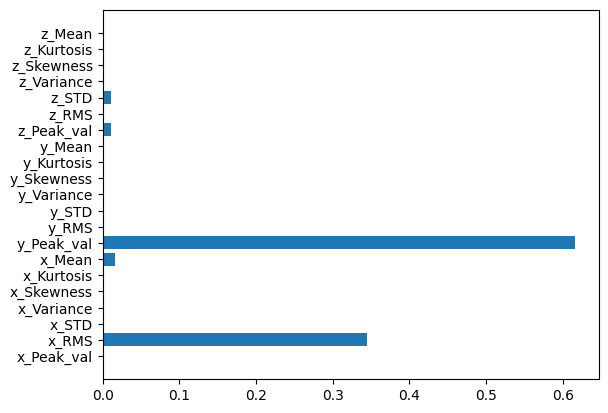

In [58]:
# візуалізуемо то наочно, і як бачимо зцифр і гістограми найцінніші вопше 2 , інші займають 1-1,5%
plt.barh(range(len(tree_model.feature_importances_)), tree_model.feature_importances_)
plt.yticks(range(len(X.columns)), X.columns)
plt.show()

In [60]:
# тож відкинемо зайві і залишимо 5, хоча можливо достатньо і двух, а леж ми хочемо найточніше. 
# оновимо датасет виливші зайве
important_features = ['x_RMS', 'x_Mean', 'y_Peak_val', 'z_RMS', 'z_STD']
X_new = X[important_features]
X_new.head()

,x_RMS,x_Mean,y_Peak_val,z_RMS,z_STD
0,1.034450,0.178448,4.616021,9.614024,0.406903
1,0.158240,-0.098641,0.023942,9.771248,0.025419
2,0.101095,-0.099918,0.244209,9.768513,0.014528
3,0.404307,0.400949,0.086191,9.752557,0.017967
4,0.404345,0.400949,0.086191,9.753676,0.018902


In [61]:
from sklearn.ensemble import RandomForestClassifier

# первизначимо тренувальну і тестову вибірку з оновленого датасету
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
# створення Random Forest класифікатора
model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
# навчання моделі
model.fit(X_train, y_train)

# прогнозування на тестових даних
y_pred = model.predict(X_test)

In [62]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9969064191802011)

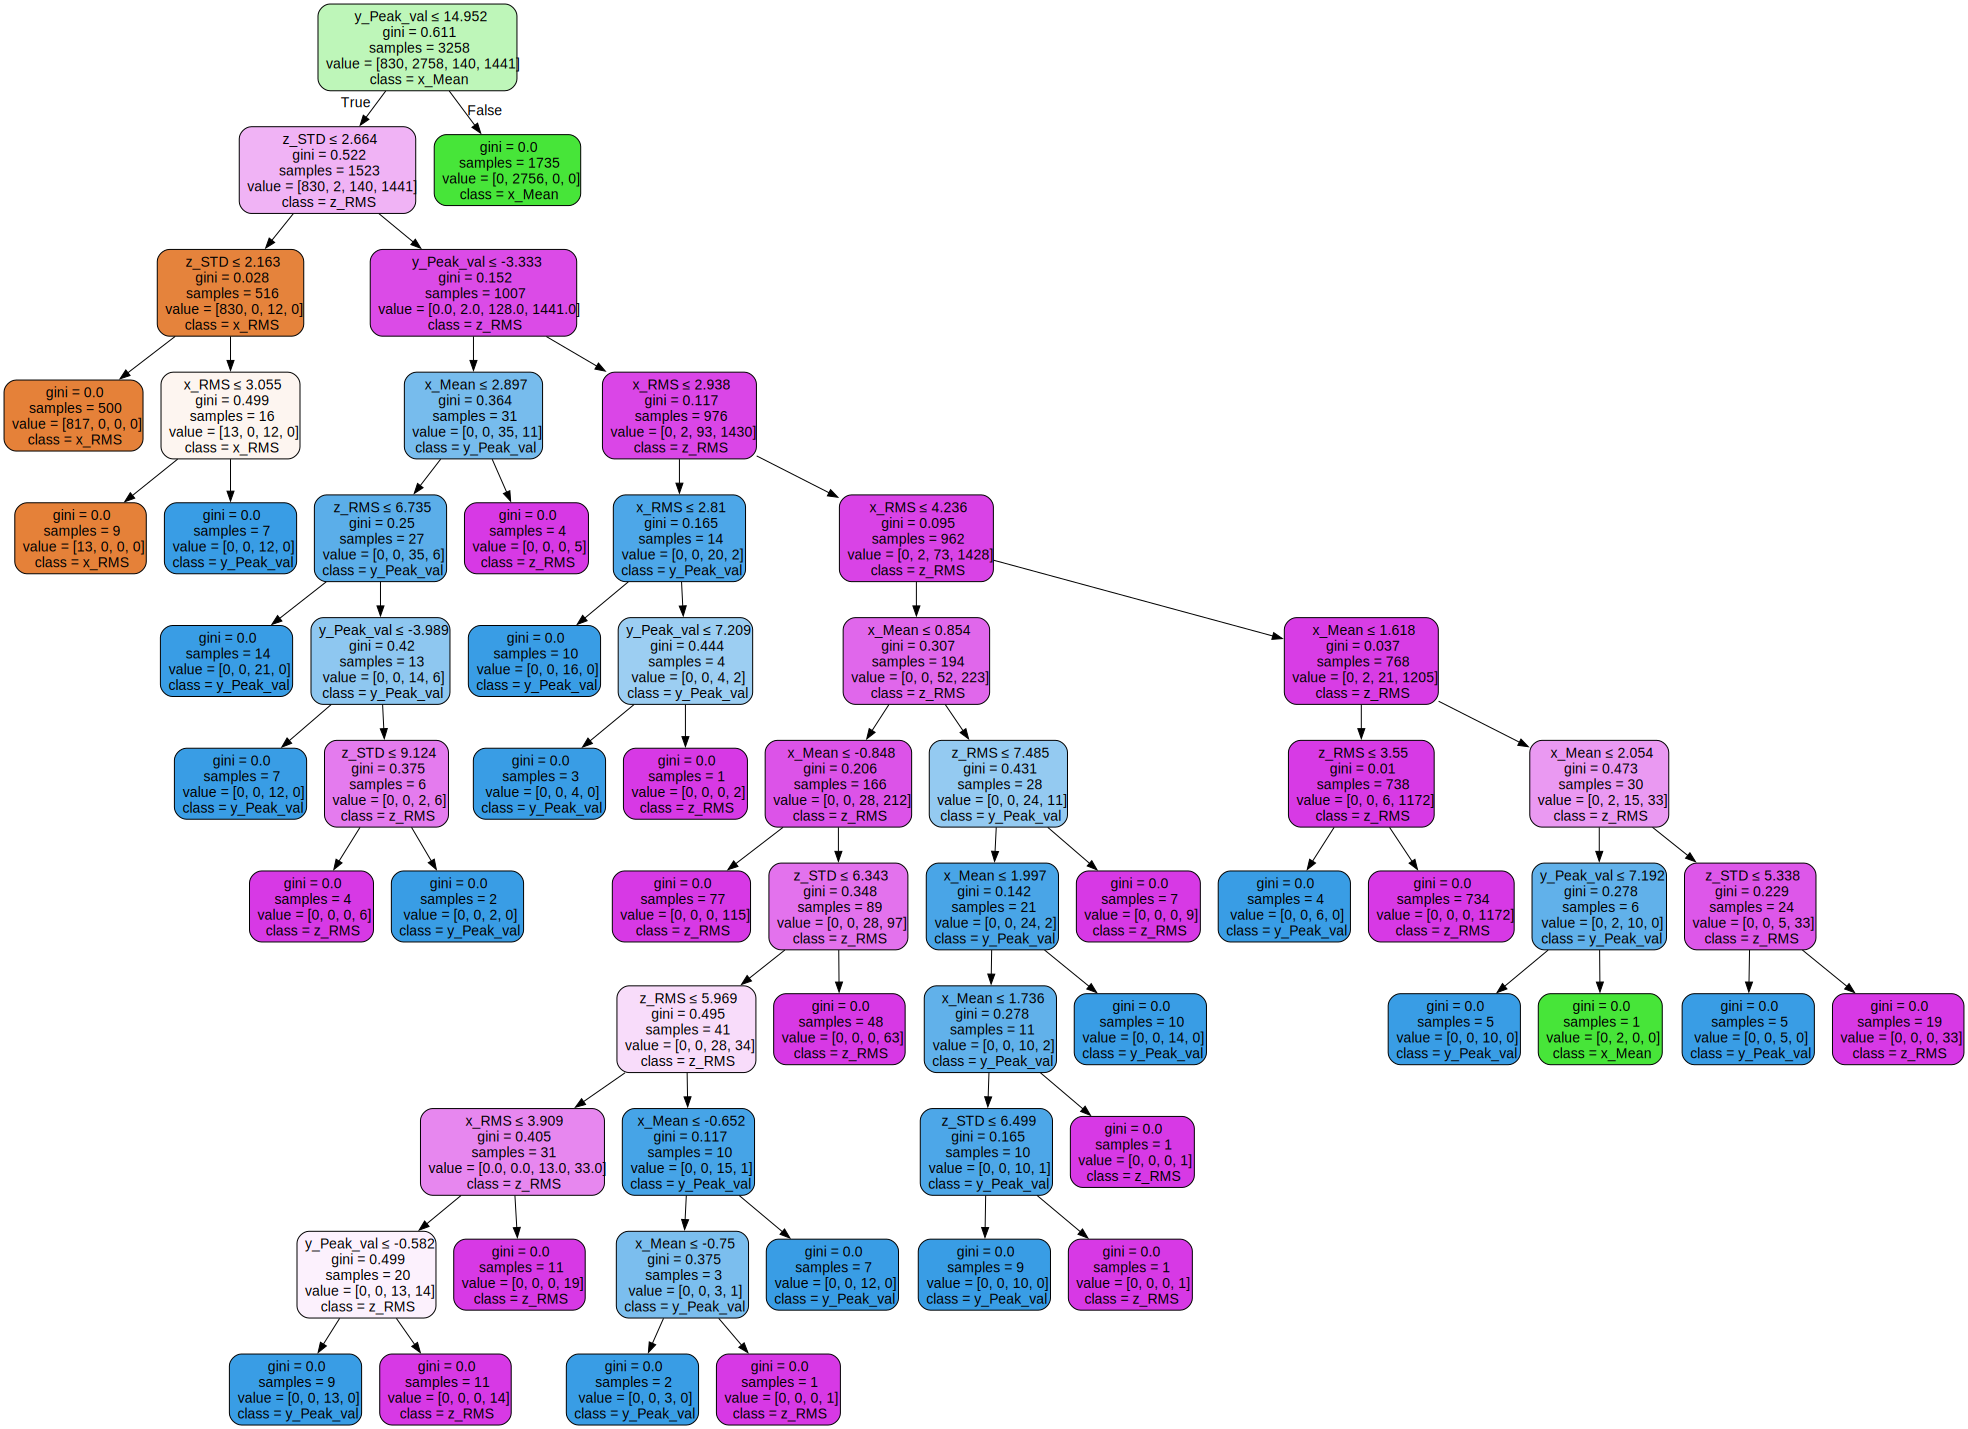

In [64]:
# візуалізація дерева
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    model.estimators_[0], out_file=None, feature_names=X_new.columns,
    class_names=X_new.columns,
    filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("Accelerometr")
graph

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# визначимо які гіперпарметрі є найкращими для нашого датасету, бо попередній розрахунок міг буть і не оптимальним.
# створення класифікатора Random Forest
model = RandomForestClassifier()

# визначення сітки гіперпараметрів для перебору
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 4]
}

# створення об'єкта GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# запуск пошуку найкращих гіперпараметрів
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [66]:
# вивід найкращих знайдених гіперпараметрів
print("Найкращі параметри:", grid_search.best_params_)

# оцінка точності моделі з найкращими параметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі з найкращими параметрами: {accuracy}")

Найкращі параметри: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Точність моделі з найкращими параметрами: 0.9969064191802011


In [67]:
y_pred_train = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

1.0

In [68]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі з найкращими параметрами: {accuracy}")

Точність моделі з найкращими параметрами: 0.9969064191802011


In [72]:
# використаємо більш розширену кількість метрик для оцінки якості моделі
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       689
      stairs       0.96      0.90      0.93        30
     walking       0.99      1.00      0.99       354

    accuracy                           1.00      1293
   macro avg       0.99      0.97      0.98      1293
weighted avg       1.00      1.00      1.00      1293



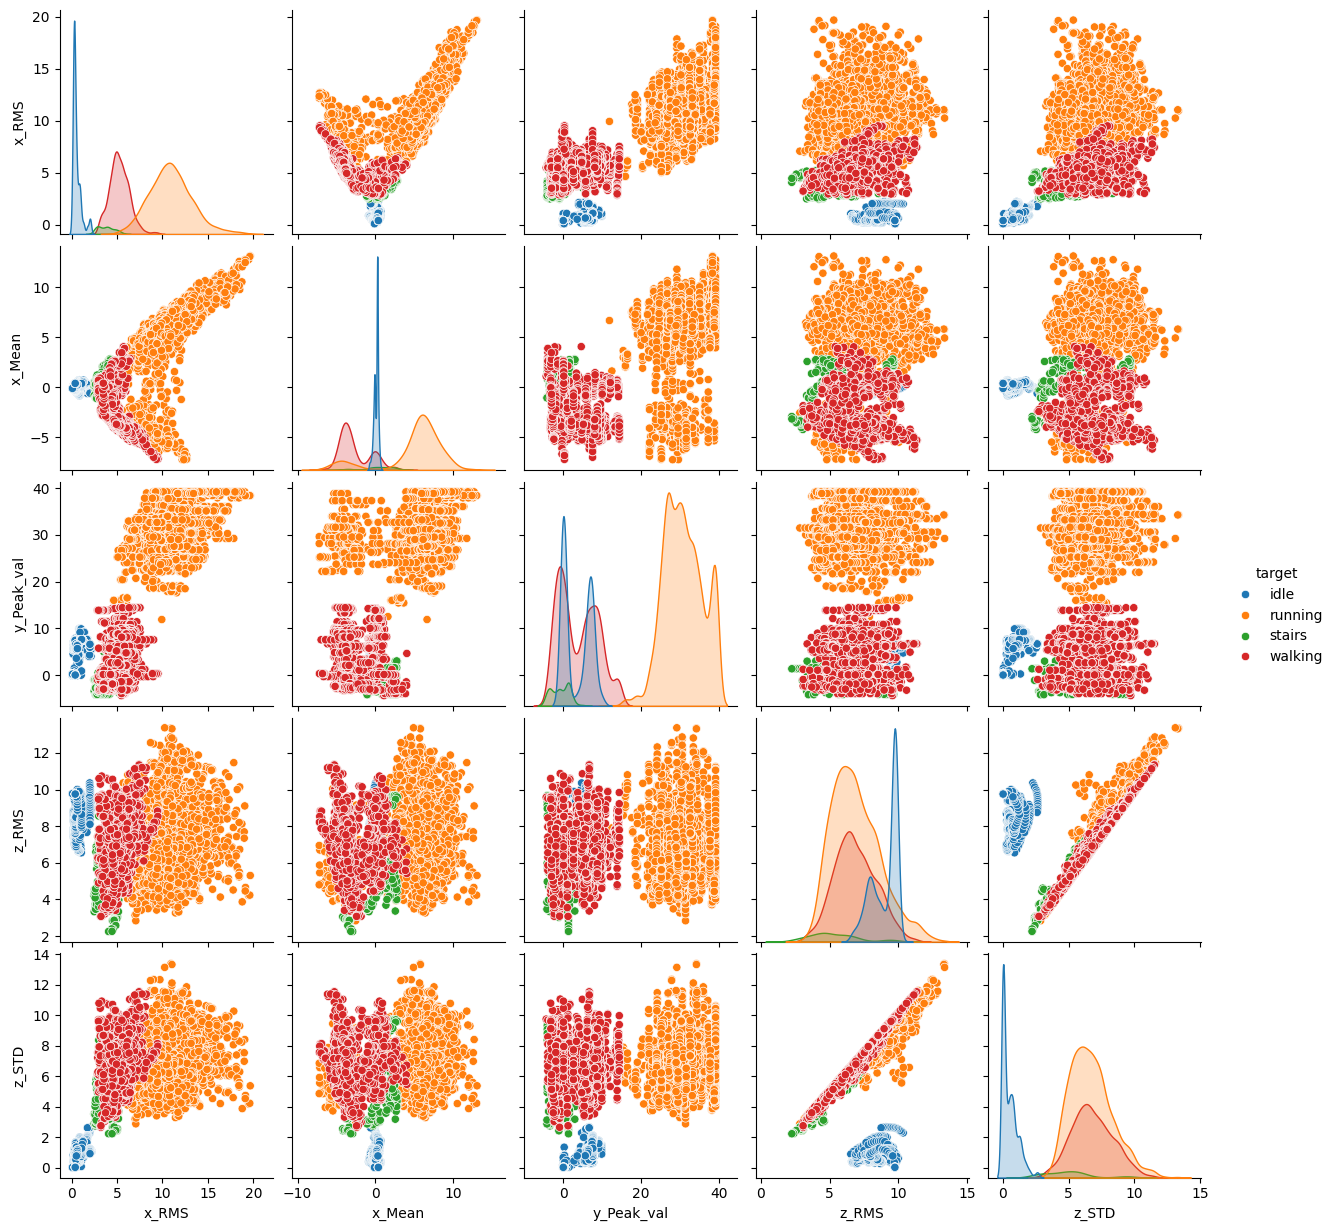

In [122]:
# на основі зменшеного датасету, зробимо візуаліцій залежності парметрів один від одгного, для розуміння а як приблизно розташовані наші дані
import seaborn as sns
important_features_all = ['x_RMS', 'x_Mean', 'y_Peak_val', 'z_RMS', 'z_STD', 'target']
df_new = df[important_features_all]
sns.pairplot(data=df_new, hue="target")

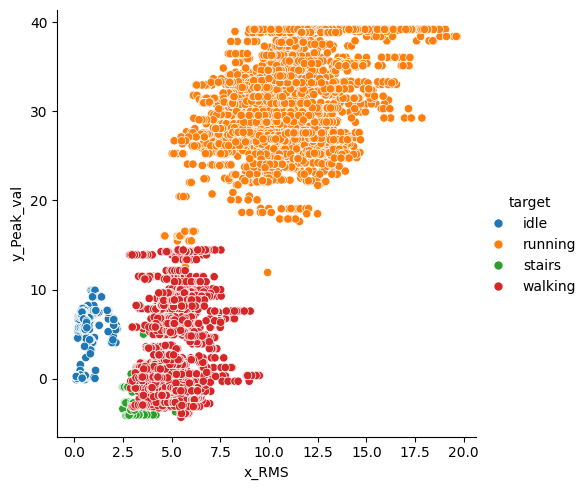

In [123]:
# окремо подивимось залежність між найвагомішими параметрами


sns.relplot(
    data=df,
    x='x_RMS', y='y_Peak_val', hue="target")

In [74]:
# побудуємо модель на основі методу опорних векторів
# для цікавості побудуємо спочатку моделі на різних ядрах з параметрами по замовчуванню
from sklearn import svm

svc_model = svm.SVC(kernel='linear')
svc_model.fit(X_train, y_train)
svc_model.score(X_new, y)

0.9876199319096255

In [75]:
y_pred_svm = svc_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       689
      stairs       0.80      0.53      0.64        30
     walking       0.96      0.99      0.97       354

    accuracy                           0.99      1293
   macro avg       0.94      0.88      0.90      1293
weighted avg       0.98      0.99      0.98      1293



In [114]:
# тестовим шляхом знайшов що найкращі параметри будуть при degree=2 чим порядок вище тим точність падає а ресурсоємність росте
svc_model_poly = svm.SVC(kernel='poly', degree=2)
svc_model_poly.fit(X_train, y_train)
svc_model_poly.score(X_new, y)

0.9743113587124729

In [115]:
y_pred_svm_poly = svc_model.predict(X_test)
print(classification_report(y_test, y_pred_svm_poly))

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       689
      stairs       0.80      0.53      0.64        30
     walking       0.96      0.99      0.97       354

    accuracy                           0.99      1293
   macro avg       0.94      0.88      0.90      1293
weighted avg       0.98      0.99      0.98      1293



In [83]:
svc_model_rbf = svm.SVC(kernel='rbf')
svc_model_rbf.fit(X_train, y_train)
svc_model_rbf.score(X_new, y)

0.9856081708449397

In [84]:
y_pred_svm_rbf = svc_model_rbf.predict(X_test)
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       689
      stairs       0.92      0.37      0.52        30
     walking       0.95      1.00      0.97       354

    accuracy                           0.98      1293
   macro avg       0.97      0.84      0.87      1293
weighted avg       0.98      0.98      0.98      1293



In [120]:
#  щож нгарвшись з дефолтними значеннями визначим які параметри всеж будуть найкращі для нашого випадку
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# словник парметрів для перебору
# 'С' залишив всього до 1, бо при 10 з ядром poly компьютерер впадав вже в дууужедовгі розрахунки, після 10 хвилин очікування скасовува операції
# 'gamma' виріши вне ставити дефолтним 1/n фіч, а вірішиі подивитись граничні , і більш менші
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1, 0.01, 0.001], # np.linspace(0, 1, 6),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   2.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.822 total time=   2.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   2.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.815 total time=   2.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.815 total time=   2.3s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.996 total time=   1.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [124]:
# найкращі гіперпараметри для SVM
print(grid.best_params_)

# скор по ним
print(grid.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.9951630993463294


In [127]:
# при найкращих шіперпараметрах при збілшенні degree точність незначно зростає, але чи це не є випадок перенавчання, може лишити 2 чи 3, не 4?
svc_model_best = svm.SVC(kernel='poly', degree=4, C=1, gamma=0.1)
svc_model_best.fit(X_train, y_train)
svc_model_best.score(X_new, y)

0.9972144846796658

In [130]:
# порівняємо репорти з методу випадкового лісу і найкраще з SVM
y_pred_svm_best = svc_model.predict(X_test)
print('алгоритм SVM', classification_report(y_test, y_pred_svm_best), sep='\n')
print('алгоритм "випадковий ліс"',classification_report(y_test, y_pred), sep='\n')

алгоритм SVM
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       689
      stairs       0.80      0.53      0.64        30
     walking       0.96      0.99      0.97       354

    accuracy                           0.99      1293
   macro avg       0.94      0.88      0.90      1293
weighted avg       0.98      0.99      0.98      1293

алгоритм "випадковий ліс"
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       689
      stairs       0.96      0.90      0.93        30
     walking       0.99      1.00      0.99       354

    accuracy                           1.00      1293
   macro avg       0.99      0.97      0.98      1293
weighted avg       1.00      1.00      1.00      1293



In [ ]:
# порівнюючи ці репорти можу зробить висновок що дерева рішень дають більш кращі результати
# що дивлячись на намішані дані і що відбір фіч ми робили пісял іх аналізу на основі того дерева рішень можливо і не дивно
# можливо якщо розрахувати інший набір фіч і відбирати іх по іншому принципу то результати будуть відрізнятися